In [160]:
import json
import bob.measure
import math
from random import randint
import face_recognition
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace
from random import randrange
import numpy as np
from matplotlib import pyplot as plt, ticker
from DET_scripts.Compute_and_Plot_DET import compute_and_plot_det, compute_det, plot_det, get_axes_labels

In [161]:
dp = FbDeepFace.loadModel()

In [162]:
def faceRecognition(img1, img2, model_name, model):
    try:
        result = DeepFace.verify(img1, img2, model_name=model_name, model=model, distance_metric="euclidean")
    except ValueError:
        return None, None

    return result['verified'], result['distance']

In [163]:
# face recognition example using DeepFace
faceRecognition("data/000/000_0.bmp", "data/000/000_2.bmp", "OpenFace", op)

Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:03<?, ?it/s]


(True, 0.5444843)

In [164]:
def face_Recognition(img1, img2, threshold=0.4):
    p1 = face_recognition.load_image_file(img1)
    p2 = face_recognition.load_image_file(img2)

    p1_encoding = face_recognition.face_encodings(p1, num_jitters=1, model="large")
    p2_encoding = face_recognition.face_encodings(p2, num_jitters=1, model="large")
    if not p1_encoding or not p2_encoding:
        return None, None
    
    dis = face_recognition.face_distance([p1_encoding[0]], p2_encoding[0])

#     results = face_recognition.compare_faces([p1_encoding[0]], p2_encoding[0], tolerance=threshold)
    if dis <= threshold:
        return True, dis[0]
    return False, dis[0]

In [165]:
# face recognition example using face_recognition
p1 = face_recognition.load_image_file("data/000/000_0.bmp")
p2 = face_recognition.load_image_file("data/000/000_3.bmp")

p1_encoding = face_recognition.face_encodings(p1, num_jitters=1, model="large")[0]
p2_encoding = face_recognition.face_encodings(p2, num_jitters=1, model="large")[0]

results = face_recognition.compare_faces([p1_encoding], p2_encoding, tolerance=0.40)
print(results)

[False]


In [166]:
def num2str(num):
    num = str(num)
    while len(num) < 3:
        num = '0' + num
    return num

In [167]:
# mated comparison
def mated_comparison(lib='deepface'):
    total = 0
    correct_matched = 0
    false_non_match = 0
    failure_to_acquire = 0
    positives = []
    path = 'data/'
    for i in range(100):
        code = num2str(i) # '000' - '099'
        _path = path + code + '/'
        img1 = _path + code + '_' + str(0) + '.bmp'
        for j in range(1, 5):
            total += 1
            tmp = _path + code + '_' + str(j) + '.bmp'
            if lib == 'deepface':
                rv, dis = faceRecognition(img1, tmp, 'DeepFace', dp)
            else:
                rv, dis = face_Recognition(img1, tmp)
            if rv is None:
                failure_to_acquire += 1
                continue
            positives.append(1/dis)
            if rv == True:
                correct_matched += 1
            else:
                false_non_match += 1
#     print('Lib: ', lib)
#     print('Total attempts: ', total)
#     print('Accuracy: ', correct_matched)
#     print('False non match rate: ', false_non_match)
#     print('Failure to acquire rate: ', failure_to_acquire)
    return positives

In [168]:
# non mated comparison
def non_mated_comparison(lib='deepface'):
    total = 0
    correct_non_match = 0
    false_matched = 0
    failure_to_acquire = 0
    negatives = []
    path = 'data/'
    for i in range(100):
        code = num2str(i) # '000' - '099'    
        _path = path + code + '/'
        for j in range(4):
            total += 1
            img1 = _path + code + '_' + str(randint(0, 4)) + '.bmp'
            k = randint(0, 99)
            while k == i:
                k = randint(0, 99)
            code2 = num2str(k)
            _path2 = path + code2 + '/'
            tmp = _path2 + code2 + '_' + str(randint(0, 4)) + '.bmp'
            if lib == 'deepface':
                rv, dis = faceRecognition(img1, tmp, 'DeepFace', dp)
            else:
                rv, dis = face_Recognition(img1, tmp)            
            if rv is None:
                failure_to_acquire += 1
                continue
            negatives.append(1/dis)
            if rv == True:
                false_matched += 1
            else:
                correct_non_match += 1
#     print('Lib: ', lib)
#     print('Total attempts: ', total)
#     print('Accuracy: ', correct_non_match)
#     print('False matched rate: ', false_matched)
#     print('Failure to acquire rate: ', failure_to_acquire)
    return negatives

In [170]:
dp_Pfa, dp_Pmiss = compute_det(np.asarray(mated_comparison(lib='deepface')), np.asarray(non_mated_comparison(lib='deepface')))
fr_Pfa, fr_Pmiss = compute_det(np.asarray(mated_comparison(lib='face_recognition')), np.asarray(non_mated_comparison(lib='face_recognition')))

Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]


Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed
Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]

Already built model is passed


Verification:   0%|          | 0/1 [00:00<?, ?it/s]


In [171]:
res = []
with open('openface_exp.txt', 'r') as f:
    for line in f:
        res.append(line.split(','))

In [172]:
op_Pfa, op_Pmiss = compute_det(np.asarray(res[0]), np.asarray(res[1]))

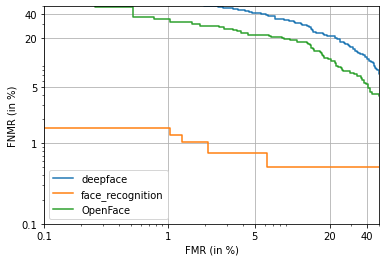

In [174]:
x_ticks = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 60e-2, 80e-2, 1])
x_ticklabels = np.array(['0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '5', '20', '40', '60', '80', '100'])
y_ticks = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 60e-2, 80e-2, 1])
y_ticklabels = np.array(['0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '5', '20', '40', '60', '80', '100'])
plt.plot(dp_Pfa, dp_Pmiss, label="deepface")
plt.plot(fr_Pfa, fr_Pmiss, label="face_recognition")
plt.plot(op_Pfa, op_Pmiss, label="OpenFace")
plt.xscale("log")
plt.yscale("log")
xmin, xmax, ymin, ymax = plt.axis()
plt.xticks(x_ticks, x_ticklabels)
plt.yticks(y_ticks, y_ticklabels)
plt.xlim(10 ** math.floor(math.log(xmin, 10)), 0.5)
plt.ylim(10 ** math.floor(math.log(ymin, 10)), 0.5)
x_label, y_label = get_axes_labels('algorithm', True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)
plt.legend(loc=0)
plt.show()
# plt.savefig("det-comp.png", format="png", bbox_inches="tight")
plt.cla()
plt.clf()
plt.close()